**TASK -2  PREDICTION USING UNSUPERVISED ML**

*BY:- SNEHA JHA*

TASK :- From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually

In [2]:
# First of all we will upload the dataset
from google.colab import files
a = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [37]:
# Here we are going to import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

**IMPORTING THE DATASET**

In [38]:
iris_df = pd.read_csv("Iris (1).csv",index_col=False)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Getting the information about the iris dataset

In [39]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**DATA VISUALIZATION**

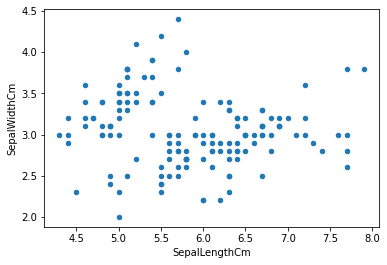

In [40]:
iris_df.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

Finding the optimum number of clusters for K MEANS

In [41]:
x = iris_df.iloc[:,[1,2,3,4]].values

from sklearn.cluster import KMeans
distortions = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  distortions.append(kmeans.inertia_)

Plotting of results

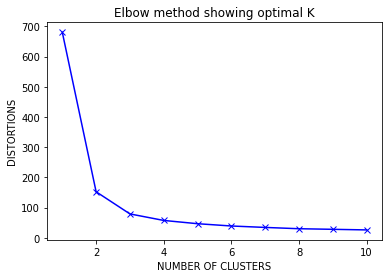

In [42]:

plt.plot(range(1,11),distortions,'bx-')
plt.title('Elbow method showing optimal K')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('DISTORTIONS')
plt.show()

When the distortions are plotted and the plot looks like an arm then the “elbow” is the best value of k.
From here we can choose the number of clusters as 4

**K MEANS MODEL**

In [55]:
kmeans = KMeans(n_clusters=4,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeanmodel= kmeans.fit_predict(x)
print(kmeanmodel)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 0 3 0 0 0 2
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2
 0 2]


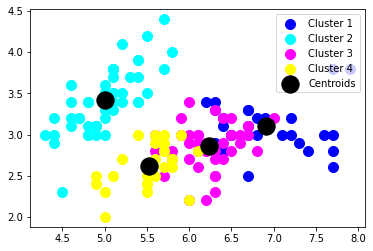

In [56]:
# Visualising the clusters
plt.scatter(x[kmeanmodel==0, 0], x[kmeanmodel==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(x[kmeanmodel==1, 0], x[kmeanmodel==1, 1], s=100, c='cyan', label ='Cluster 2')
plt.scatter(x[kmeanmodel==2, 0], x[kmeanmodel==2, 1], s=100, c='magenta', label ='Cluster 3')
plt.scatter(x[kmeanmodel==3, 0], x[kmeanmodel==3, 1], s=100, c='yellow', label ='Cluster 4')

# Visalising the Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')
plt.legend()

